# Example: REV analysis for PNM characteristics.

This example demonstrates how to perform REV analysis for the characteristics of pore-network model (PNM) extracted from 3d binary image.

Here, we perform REV analysis for pore number, normalized over the subsample volume (total number of voxels), and pore radius distribution.

In [1]:
from revanalyzer import REVAnalyzer
from revanalyzer.vectorizers import HistVectorizer
from revanalyzer.metrics import PoreNumber, PoreRadius

[11:40:03] ERROR    PARDISO solver not installed, run `pip install           ]8;id=1732092003.6703281-750183;file:///home/azubov/miniconda3/lib/python3.9/site-packages/openpnm/utils/_workspace.py\_workspace.py]8;;\:56
                    pypardiso`. Otherwise, simulations will be slow. Apple M                 
                    chips not supported.

In [2]:
#initialization

image = 'ceramic300' #binary file of 'uint8' type representing 3D image.
size = (300, 300, 300) #size of image in x, y and z directions
n_steps = 6 # number of subsamples selection steps
sREV_max_step = 4 #maximal step for which sREV analysis is performed.
datadir = 'data' # path to folder containing image, default: 'data'
outputdir = 'output' # path to outputfolder containig image, default: 'output'

n_threads = 32 #number of threads, default: 1
resolution = 1. #resolution of studied sample (unitless), default: 1.
show_time = True #default: False. Added to monitor time cost for large images.

metric = PoreNumber(n_threads = n_threads, resolution = resolution, show_time = show_time)
analyzer = REVAnalyzer(metric = metric, image = image, size = size, n_steps = n_steps, sREV_max_step = sREV_max_step,
                       datadir = datadir, outputdir = outputdir)

In [3]:
#generate metric data for all the subsamples
analyzer.generate()

cut1_2
---PNM extractor run time is 4.792585372924805 seconds ---
cut1_3
---PNM extractor run time is 4.810221195220947 seconds ---
cut1_7
---PNM extractor run time is 4.8615007400512695 seconds ---
cut1_5
---PNM extractor run time is 4.88535737991333 seconds ---
cut1_1
---PNM extractor run time is 4.89664626121521 seconds ---
cut1_6
---PNM extractor run time is 5.065294504165649 seconds ---cut1_0

---PNM extractor run time is 5.075937032699585 seconds ---
cut1_8
---PNM extractor run time is 5.2342529296875 seconds ---
cut1_4
---PNM extractor run time is 5.273944139480591 seconds ---


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

cut2_1
---PNM extractor run time is 7.890487432479858 seconds ---
cut2_5
---PNM extractor run time is 8.053836822509766 seconds ---
cut2_6
---PNM extractor run time is 8.102356195449829 seconds ---
cut2_2
---PNM extractor run time is 8.17135238647461 seconds ---
cut2_4
---PNM extractor run time is 8.291401624679565 seconds ---
cut2_3
---PNM extractor run time is 8.479234218597412 seconds ---
cut2_7
---PNM extractor run time is 8.465580224990845 seconds ---
cut2_8
---PNM extractor run time is 8.533592224121094 seconds ---


0it [00:00, ?it/s]

cut2_0
---PNM extractor run time is 8.860748767852783 seconds ---


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

cut3_1
---PNM extractor run time is 15.143069505691528 seconds ---


0it [00:00, ?it/s]

0it [00:00, ?it/s]

cut3_3
---PNM extractor run time is 15.473021268844604 seconds ---
cut3_8
---PNM extractor run time is 15.519548416137695 seconds ---
cut3_5
---PNM extractor run time is 15.712179183959961 seconds ---
cut3_0
---PNM extractor run time is 16.043420553207397 seconds ---
cut3_4
---PNM extractor run time is 15.901154279708862 seconds ---
cut3_6
---PNM extractor run time is 15.915544271469116 seconds ---


0it [00:00, ?it/s]

cut3_2
---PNM extractor run time is 16.276078939437866 seconds ---
cut3_7
---PNM extractor run time is 16.152503490447998 seconds ---


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Extracting pore and throat properties:   0%|          | 0/1985 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Extracting pore and throat properties:   0%|          | 0/1905 [00:00<?, ?it/s]

Extracting pore and throat properties:   0%|          | 0/2044 [00:00<?, ?it/s]

Extracting pore and throat properties:   0%|          | 0/1992 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

cut4_1
---PNM extractor run time is 30.002808570861816 seconds ---
cut4_3
---PNM extractor run time is 30.54191017150879 seconds ---
cut4_4
---PNM extractor run time is 30.652855157852173 seconds ---


0it [00:00, ?it/s]

cut4_0
---PNM extractor run time is 31.518258571624756 seconds ---
cut4_2
---PNM extractor run time is 31.505664110183716 seconds ---
cut4_8
---PNM extractor run time is 27.447739124298096 seconds ---
cut4_6
---PNM extractor run time is 28.113446950912476 seconds ---
cut4_7
---PNM extractor run time is 28.497106075286865 seconds ---
cut4_5
---PNM extractor run time is 28.873961448669434 seconds ---


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Extracting pore and throat properties:   0%|          | 0/3486 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

cut5_0
---PNM extractor run time is 50.44547748565674 seconds ---


Extracting pore and throat properties:   0%|          | 0/5666 [00:00<?, ?it/s]

cut6_0
---PNM extractor run time is 87.28291392326355 seconds ---
---total PN data generation time is 92.8265655040741 seconds ---


In [4]:
#fix thresholds and analyze generated data
analyzer.analyze(dREV_threshold = 0.2, sREV_threshold = 0.2)

In [5]:
#get mean, std and normed std values for different cut sizes
print(analyzer.metric_mean)
print(analyzer.metric_std)
print(analyzer.metric_normed_std)

#get sREV and dREV sizes
print(analyzer.sREV_size_1)
print(analyzer.dREV_size_1)
print(analyzer.dREV_size_2)


{1: 0.0006835555555555555, 2: 0.00036977777777777774, 3: 0.00028421399176954736, 4: 0.0002459027777777778, 5: 0.000223104, 6: 0.00020985185185185185}
{1: 8.027606687911565e-05, 2: 2.9445911913117278e-05, 3: 1.325649760625214e-05, 4: 7.343926481987645e-06}
{1: 0.117438979504558, 2: 0.07963137236119457, 3: 0.04664266359202001, 4: 0.02986516276210734}
50
150
200


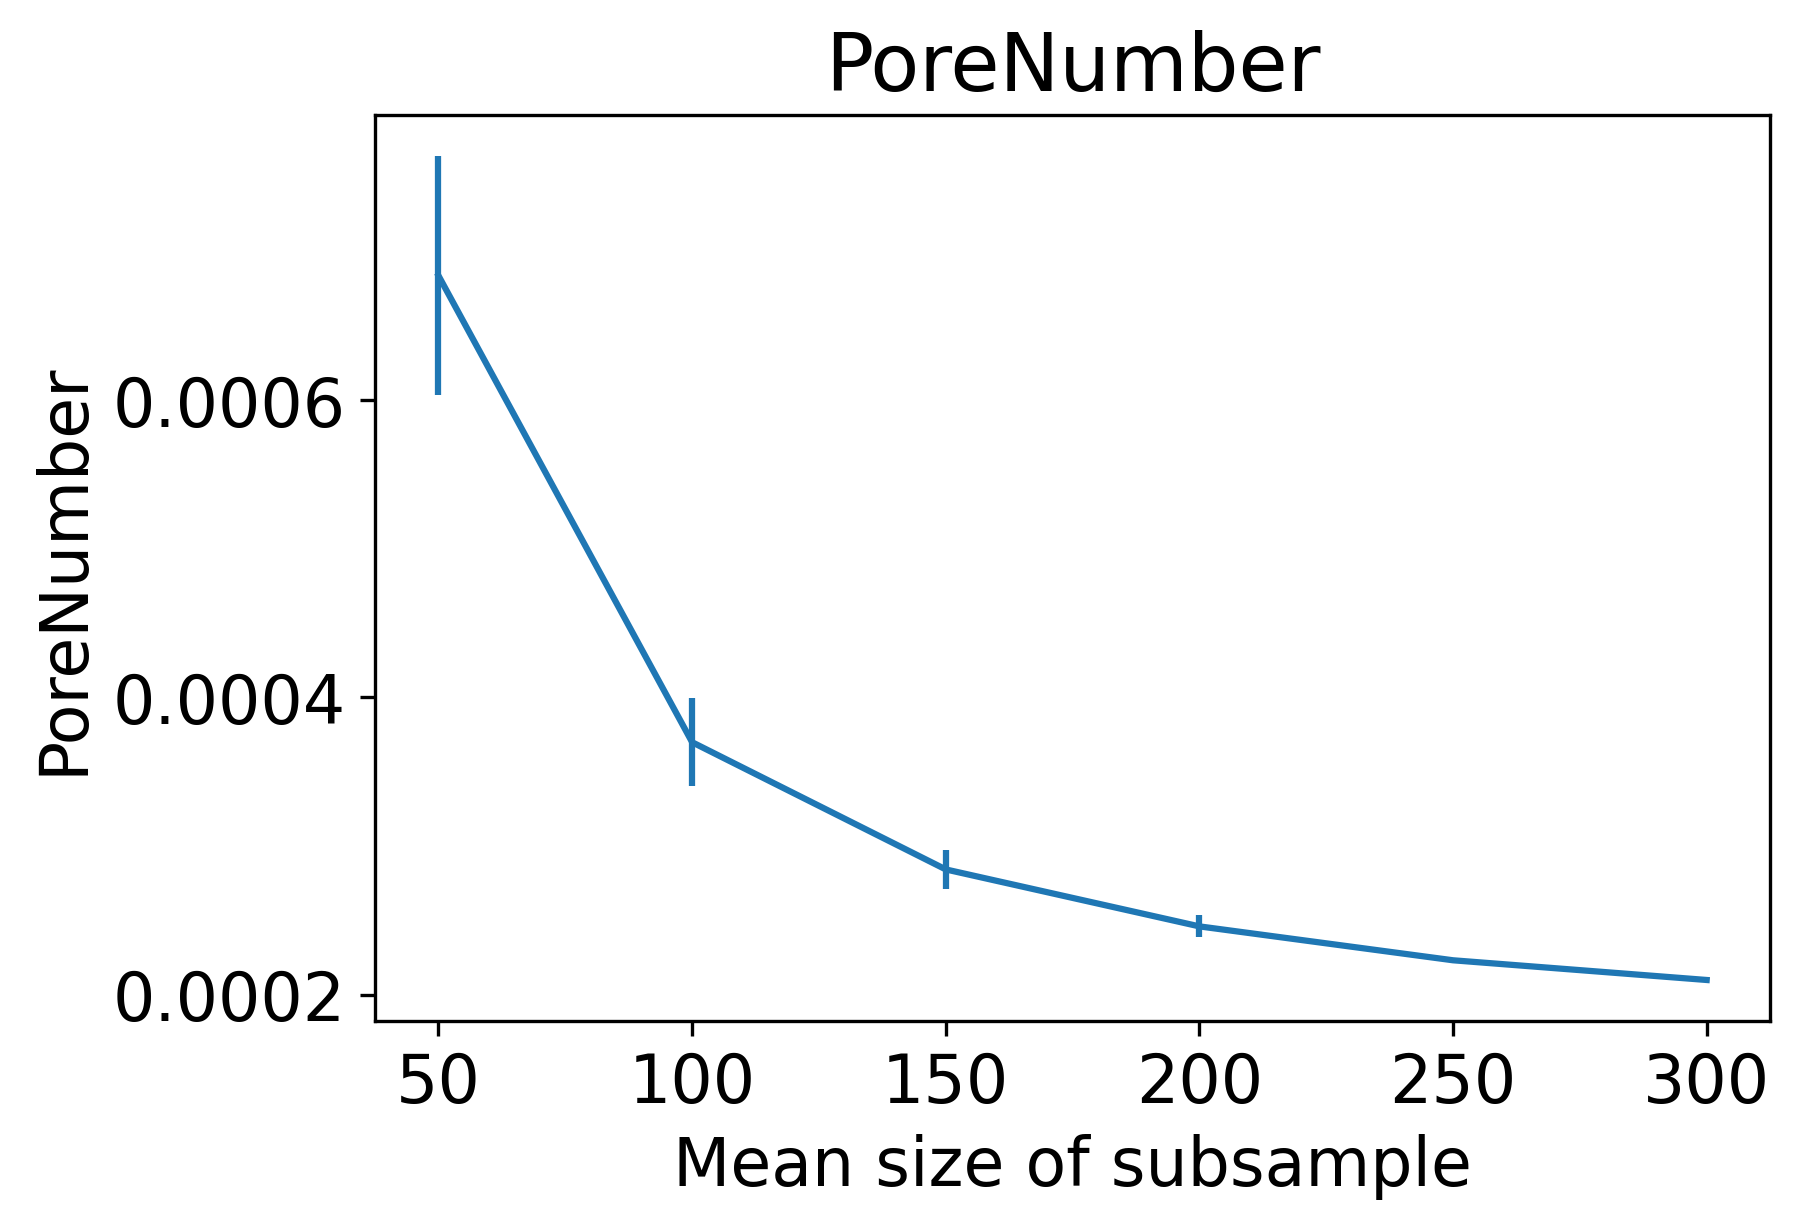

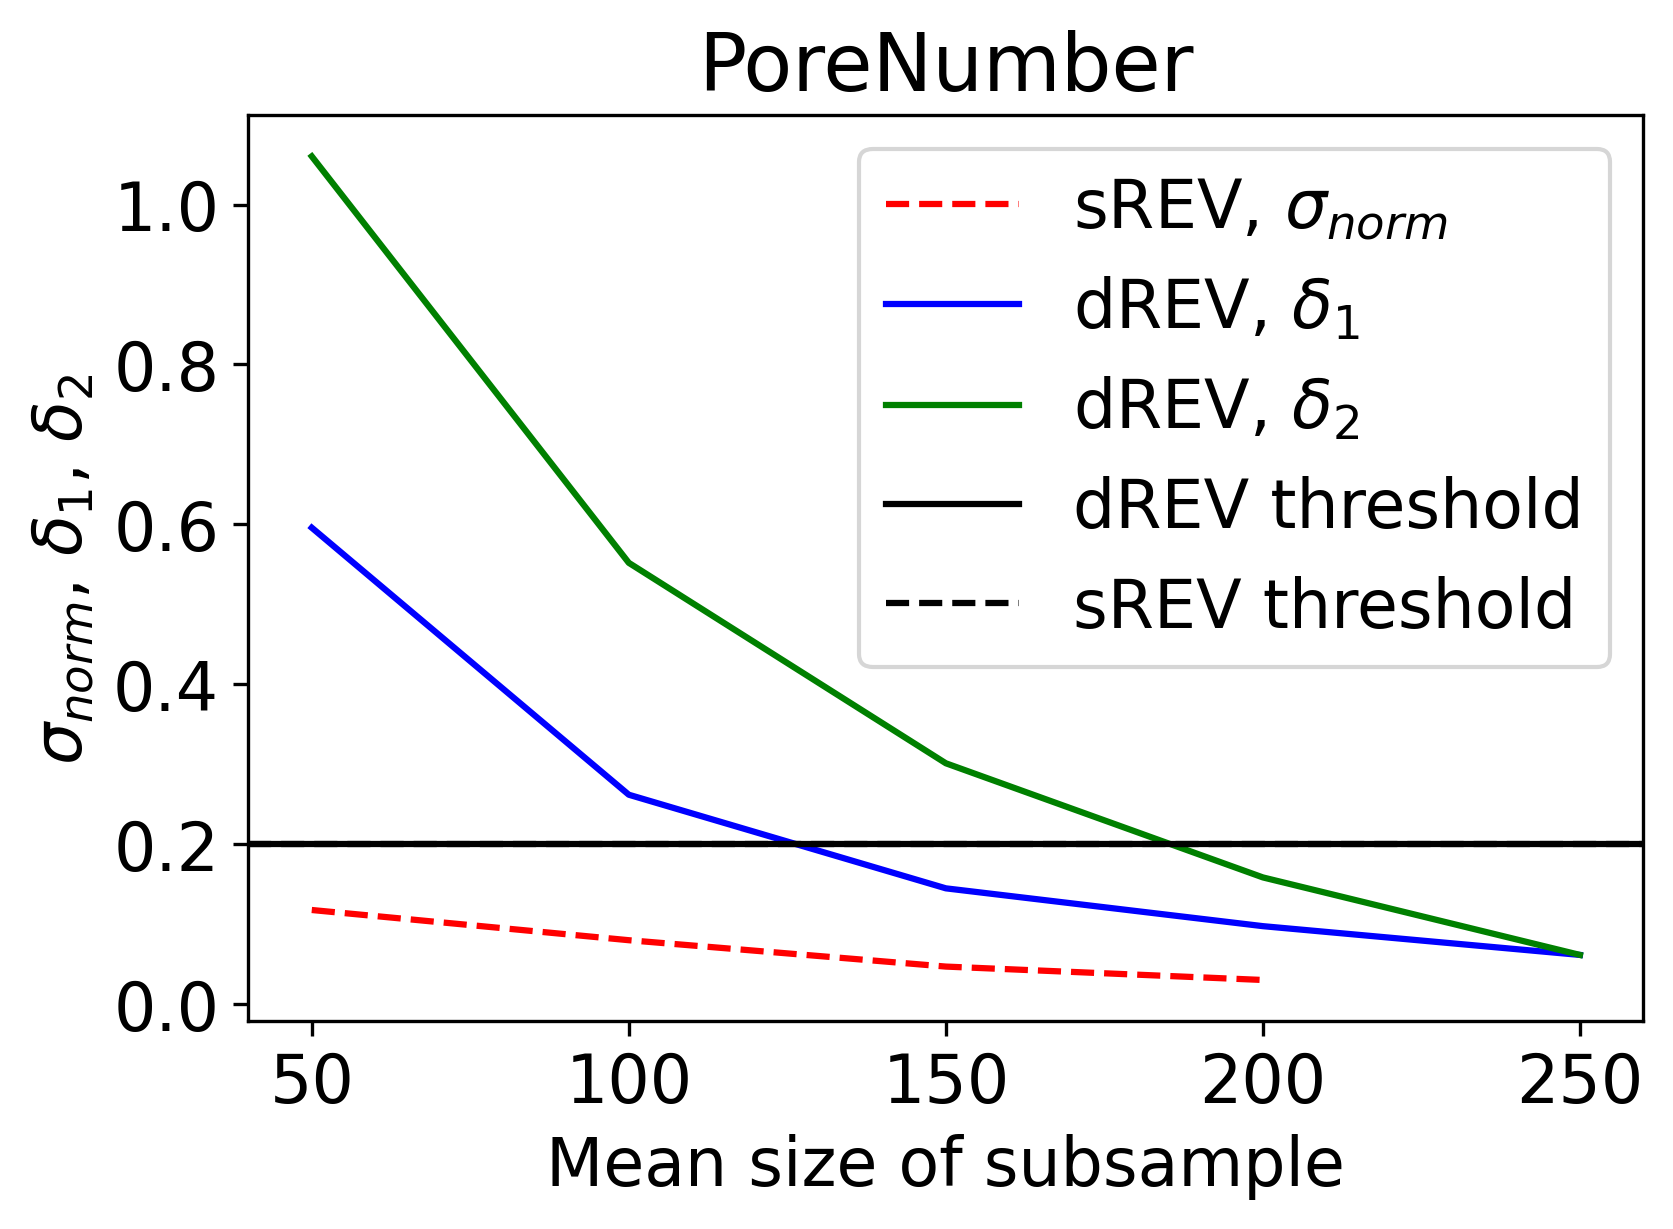

In [6]:
analyzer.show_results()

In [7]:
#Now, let us analyze pore radius metric.

#initialization

norm = 2  #Norm of vectors used in REV analysis. The same, as parameter 'ord' in numpy.linalg.norm function; 
          #default: 2.
factor = 1 #Factor defines how many bins are in linear size of one voxel, default: 1.

vectorizer = HistVectorizer(factor = factor, norm = norm)

metric = PoreRadius(vectorizer = vectorizer, n_threads = n_threads, show_time = True)

analyzer = REVAnalyzer(metric = metric, image = image, size = size, n_steps = n_steps, sREV_max_step = sREV_max_step,
                       datadir = datadir, outputdir = outputdir)

In [8]:
#generate metric data for all the subsamples. Note, that PNM statistics are already obtained by PNM extractor,
#run for pore number metric.
analyzer.generate()

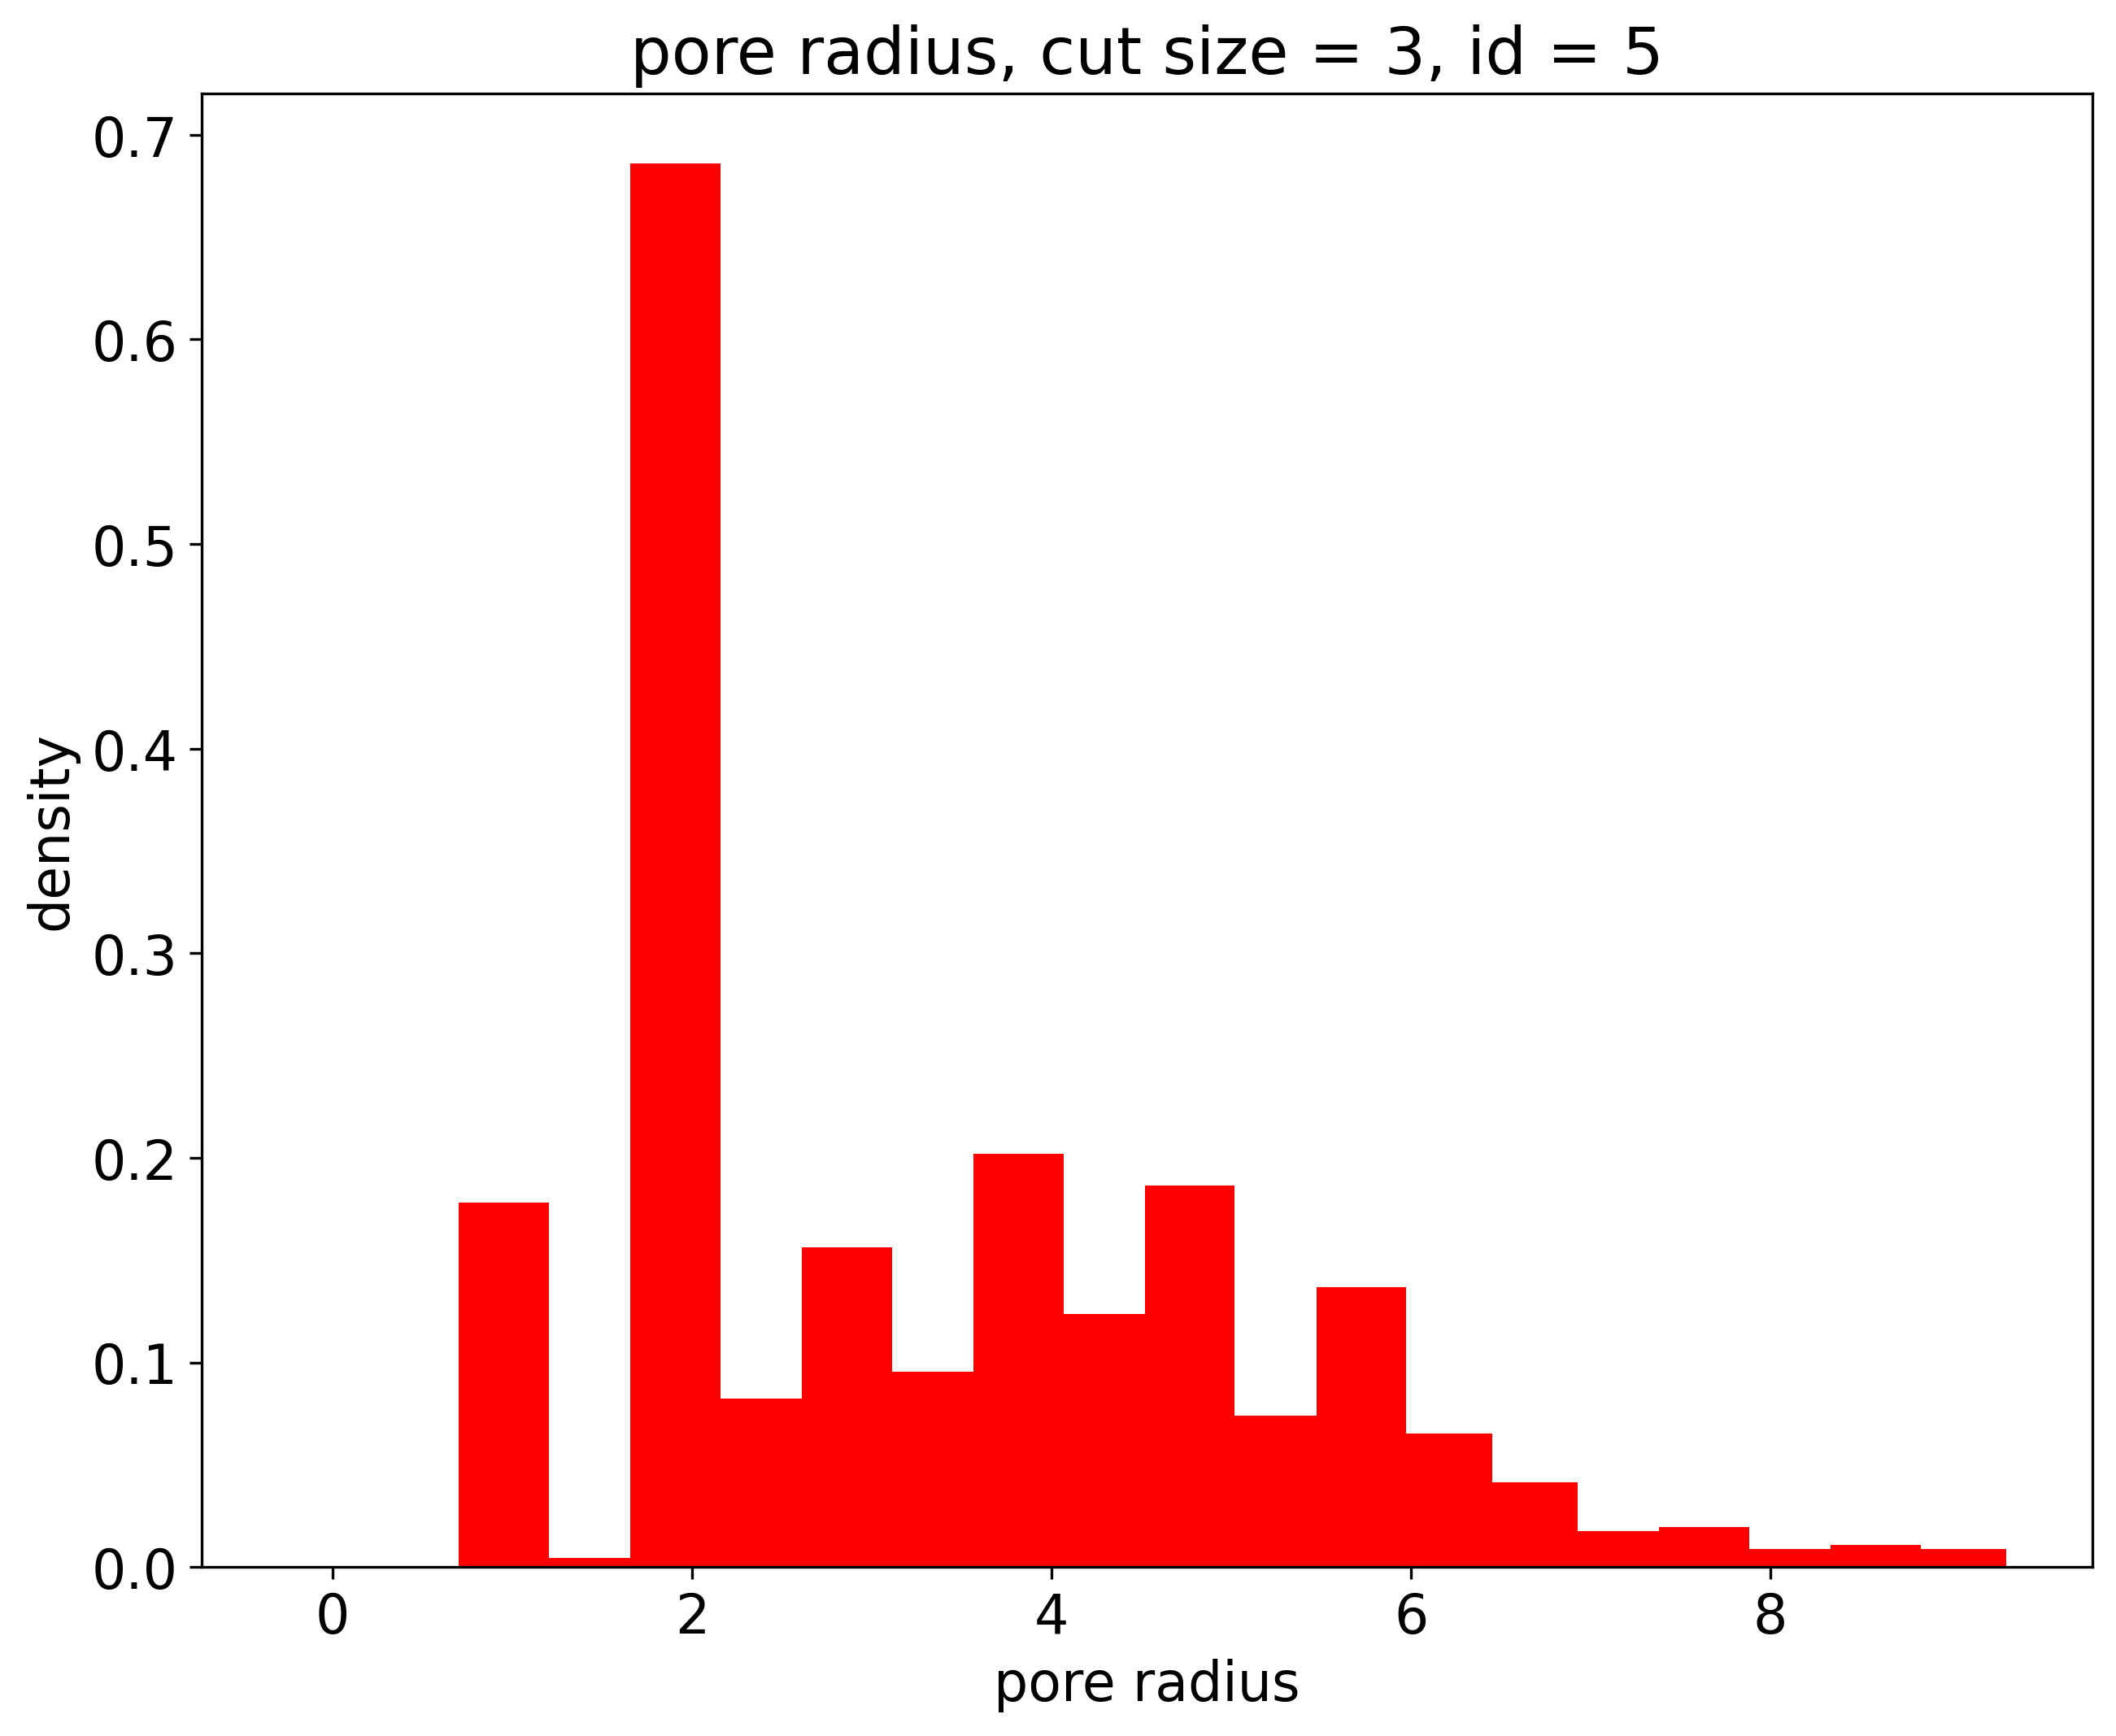

In [9]:
step = 3
cut_id = 5
#Visualize thec distribuiton of this metric for a given subsample:
nbins = 20 #number of bins in a histogram
analyzer.show(step = step, cut_id = cut_id, nbins = nbins)

In [10]:
#vectorization
analyzer.vectorize()

In [11]:
#fix thresholds and analyze vectorized data
analyzer.analyze(dREV_threshold = 0.2, sREV_threshold = 0.2)

In [12]:
print(analyzer.metric_mean)
print(analyzer.metric_std)
print(analyzer.metric_normed_std_1)
print(analyzer.metric_normed_std_2)

{1: 0.3078758534683433, 2: 0.20707044090989082, 3: 0.15175804898388362, 4: 0.10593352098267506, 5: 0.09149947307328987}
{1: 0.06400641208119004, 2: 0.03652245345125882, 3: 0.03761059359170939, 4: 0.014928103092259927}
{1: 0.32003206040595017, 2: 0.1826122672562941, 3: 0.18805296795854692, 4: 0.07464051546129963}
{1: 0.20789682386628405, 2: 0.17637695313138393, 3: 0.18805296795854692, 4: 0.07464051546129963}


In [13]:
#get dREV and sREV size estimation
print(analyzer.dREV_size_1)
print(analyzer.sREV_size_1)
print(analyzer.sREV_size_2)

150
100
100


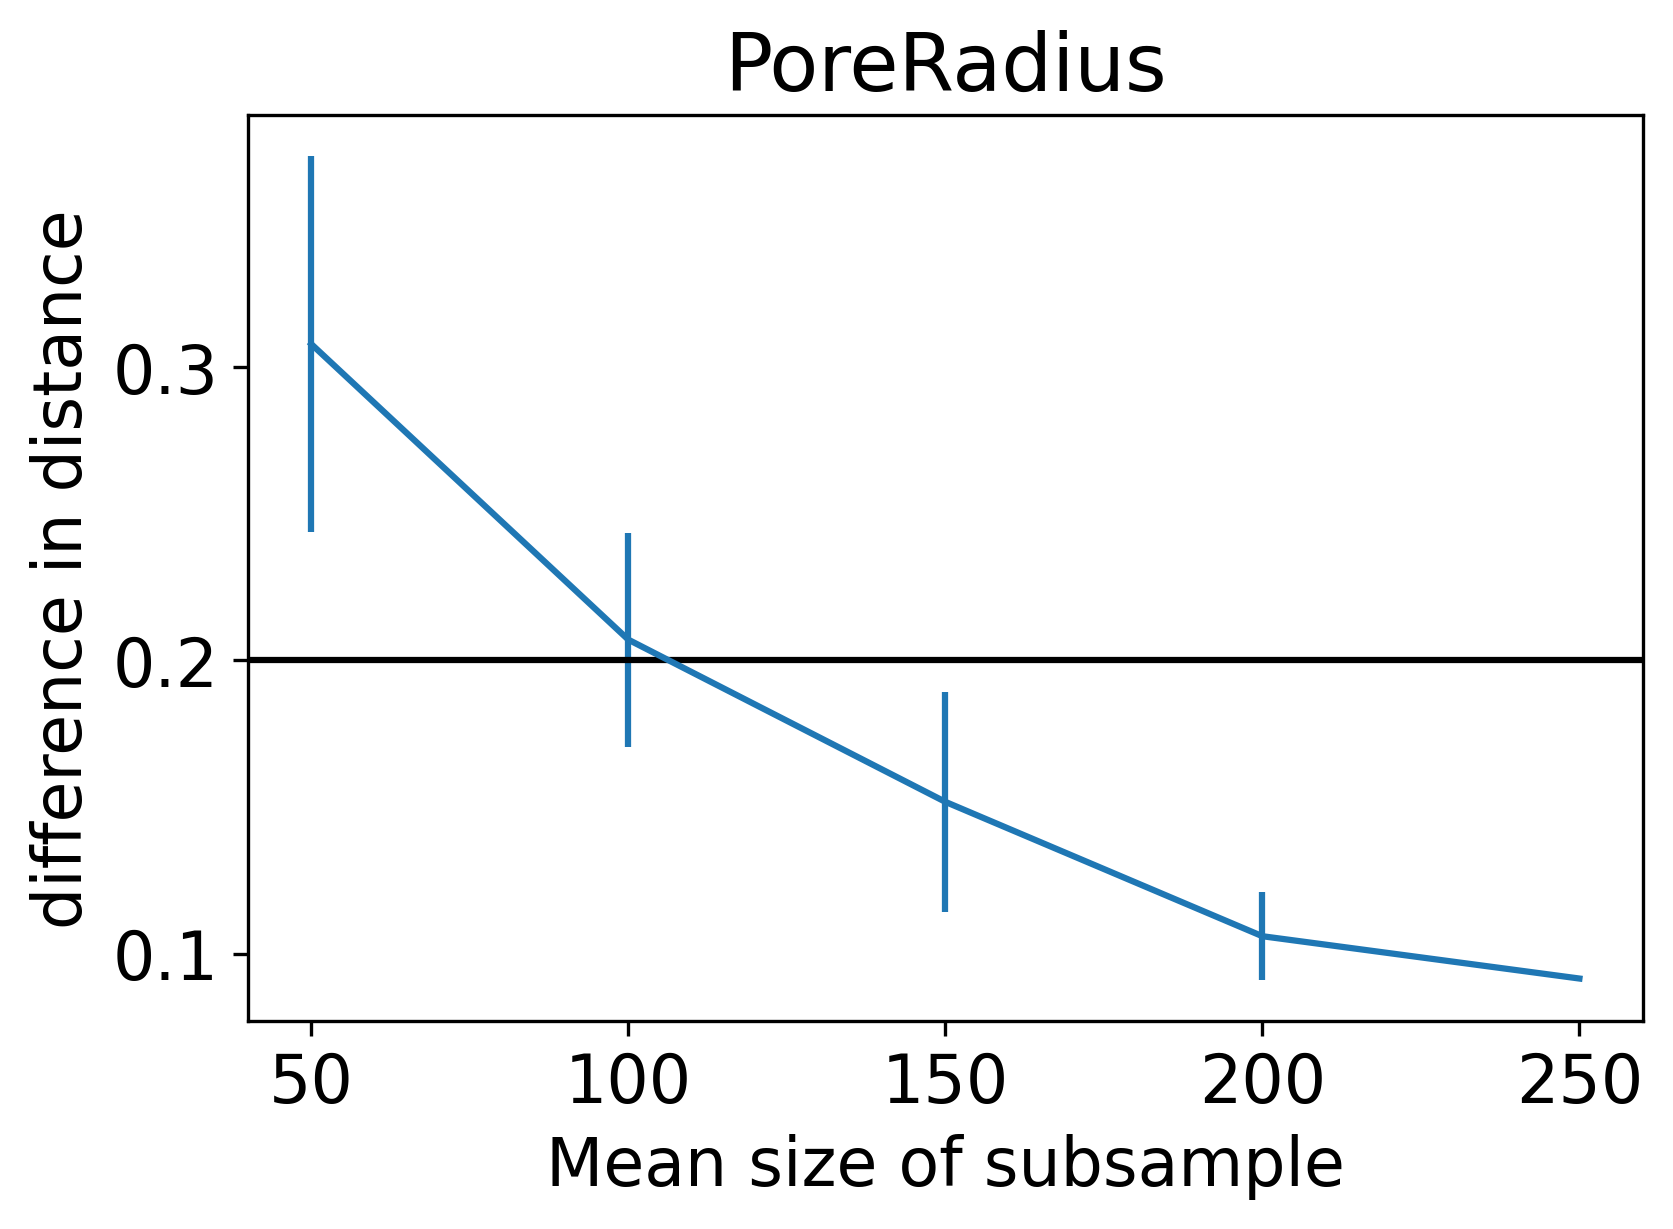

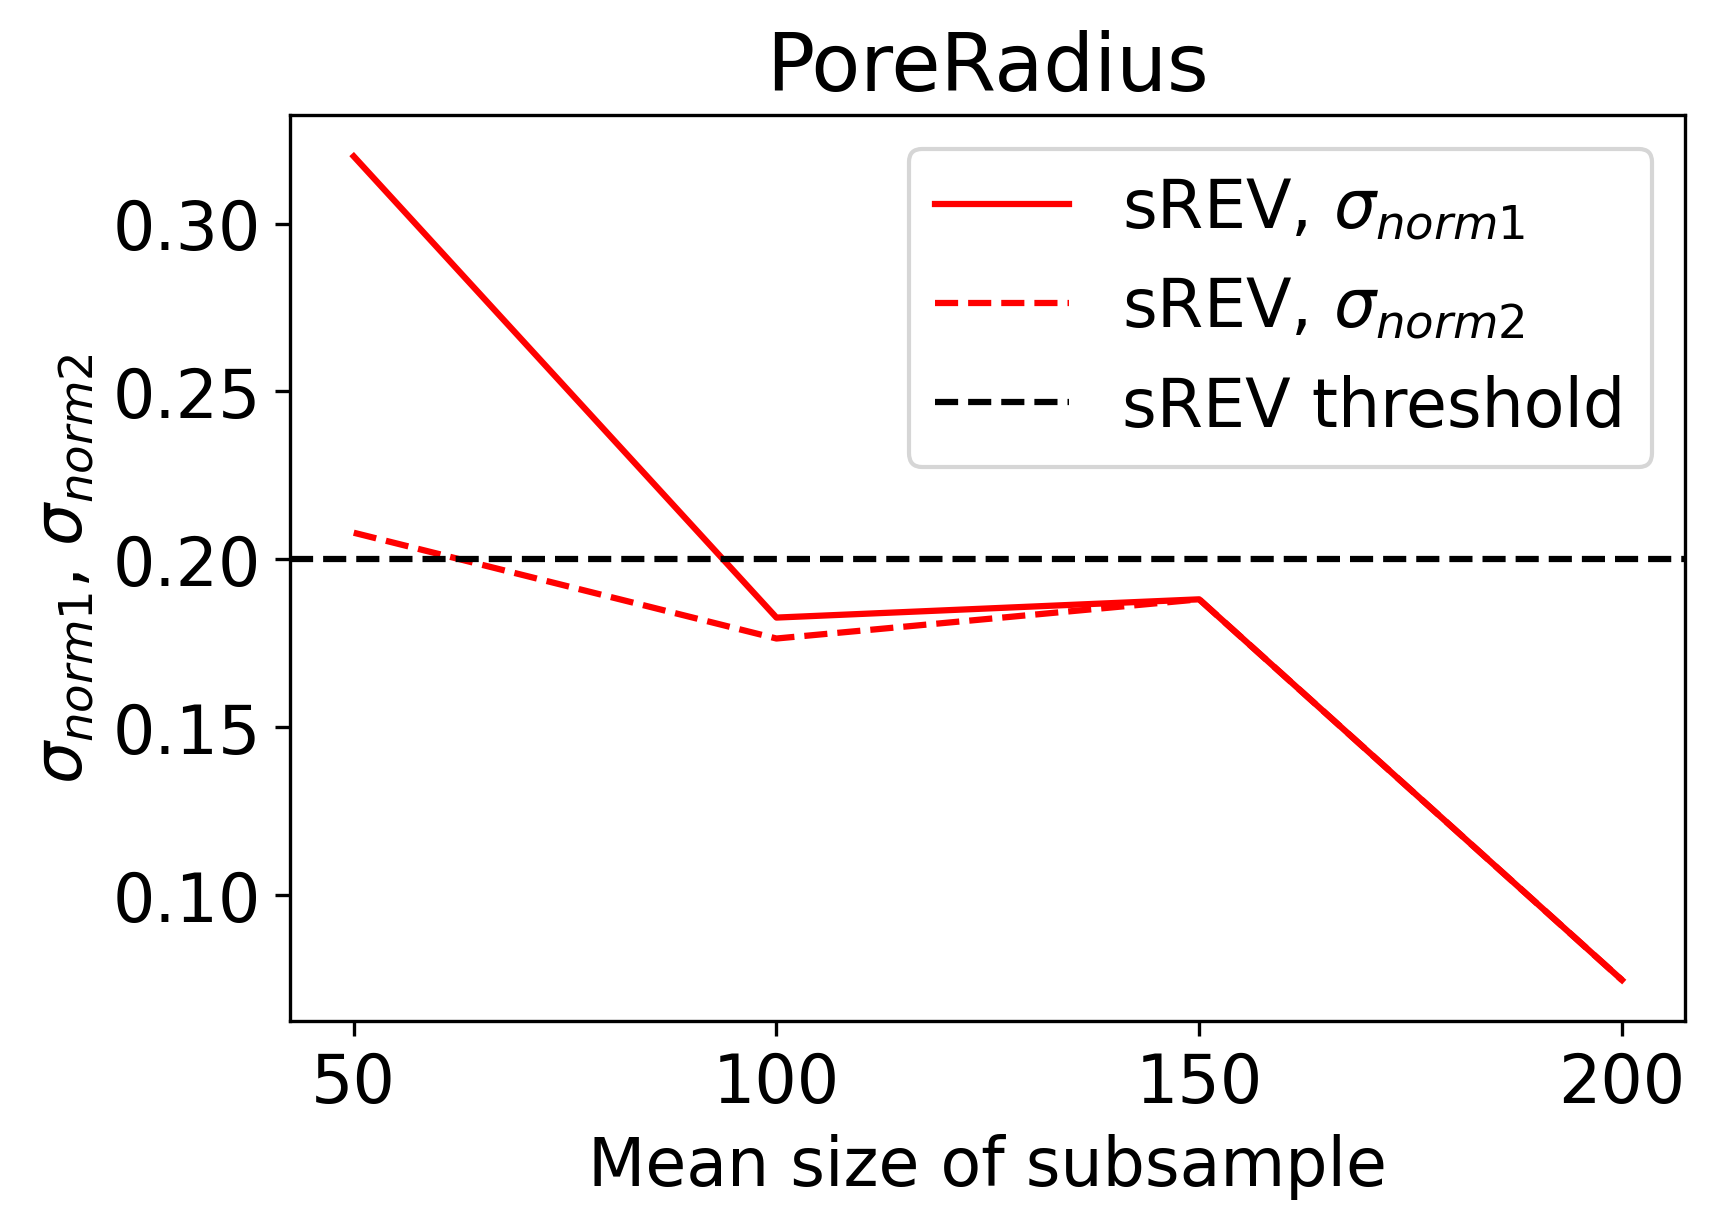

In [14]:
analyzer.show_results()